In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils


In [2]:
train = pd.read_csv(f'./../../Dataset/food_train.tsv', index_col='Index', encoding='utf-8', sep='\t')
X_train = train.drop(columns = 'target')
y_train = train.target
del train
X_test = pd.read_csv(f'./../../Dataset/food_X_test.tsv', index_col='Index', encoding='latin', sep='\t')
y_test_submission_example = pd.read_csv(f'./../../Dataset/y_test_submission_example.tsv', index_col='Index', encoding='utf-8', sep='\t')

In [3]:
X_train,X_test = utils.clean_null(X_train,X_test,0.5)
# remove brands_tags
X_train.drop(columns =['brands_tags'],inplace= True)
X_test.drop(columns =['brands_tags'],inplace= True)


Train init shape  (102028, 57)
Test  init shape  (25508, 57)
has  82.84686556631513 % null elements -> deleting .. generic_name
has  70.76684831614851 % null elements -> deleting .. quantity
has  74.81181636413532 % null elements -> deleting .. packaging
has  74.8127964872388 % null elements -> deleting .. packaging_tags
has  70.80507311718351 % null elements -> deleting .. categories
has  70.80507311718351 % null elements -> deleting .. categories_tags
has  70.80507311718351 % null elements -> deleting .. categories_en
has  93.74877484612068 % null elements -> deleting .. origins
has  93.75269533853452 % null elements -> deleting .. origins_tags
has  87.8680362253499 % null elements -> deleting .. manufacturing_places
has  87.8680362253499 % null elements -> deleting .. manufacturing_places_tags
has  82.01964166699337 % null elements -> deleting .. labels
has  81.98729760457914 % null elements -> deleting .. labels_tags
has  81.98729760457914 % null elements -> deleting .. labels_en
h

In [4]:
train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test')

********************train********************
shape  (102028, 21)
********************test********************
shape  (25508, 21)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
created_t,25508.0,1.475883e+09,3.107721e+07,1.329342e+09,1.480619e+09,1.489067e+09,1.489133e+09,1.505683e+09,23386,0,0.000000
last_modified_t,25508.0,1.485848e+09,1.674066e+07,1.341240e+09,1.489053e+09,1.489076e+09,1.489144e+09,1.505683e+09,23323,0,0.000000
additives_n,23016.0,1.895116e+00,2.480975e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.700000e+01,25,2492,0.097695
ingredients_from_palm_oil_n,23016.0,2.845846e-02,1.693888e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3,2492,0.097695
ingredients_that_may_be_from_palm_oil_n,23016.0,6.612791e-02,3.013009e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,6,2492,0.097695


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,25508,806,usda-ndb-import,13483,0,0.000000
created_datetime,25508,23386,2017-03-09T10:45:47Z,5,0,0.000000
last_modified_datetime,25508,23323,2017-03-09T12:13:31Z,4,0,0.000000
product_name,25236,22577,Ice Cream,46,272,0.010663
brands,24999,11027,Carrefour,336,509,0.019955
countries,25500,290,US,13478,8,0.000314
countries_tags,25500,173,en:united-states,13629,8,0.000314
countries_en,25500,173,United States,13629,8,0.000314
ingredients_text,23016,21999,"Semolina (wheat), durum flour (wheat), niacin,...",19,2492,0.097695
serving_size,17907,5171,28 g (1 oz),447,7601,0.297985


In [5]:
total_dataset = pd.concat([X_train,X_test])
process_categories = utils.process_categories()

In [6]:
total_dataset.serving_size = total_dataset.serving_size.apply(process_categories.get_quantity)
total_dataset.serving_size.head()

Index
104815     34.0
62513       NaN
111040     57.0
62964      19.0
57032     226.0
Name: serving_size, dtype: float64

In [7]:
total_dataset['countries2'] = total_dataset['countries'].apply(process_categories.process_countries)
total_dataset[['countries','countries2']].head(3)


,countries,countries2
Index,,
104815,US,US
62513,US,US
111040,US,US


In [8]:
total_dataset['additives2'] = total_dataset['additives'].apply(process_categories.process_aditives)
total_dataset[['additives','additives2']].head(3)


,additives,additives2
Index,,
104815,[ wheat-flour -> en:wheat-flour ] [ flour -...,"wheat-flour,flour,corn-syrup,syrup,dextrose,s..."
62513,[ select-potatoes -> en:select-potatoes ] [...,"select-potatoes,potatoes,vegetable-shortening..."
111040,[ chickpeas -> en:chickpeas ] [ water -> en...,"chickpeas,water,vegetable-oil,oil,soy,olive,s..."


In [9]:
PRETRAINED_MODEL_PATH = './../../../Models/lid.176.bin'
bnp_process_text = utils.bnp_process_text(PRETRAINED_MODEL_PATH)
total_dataset['brands_language'] = total_dataset['brands'].apply(bnp_process_text.get_language_fasttext)
#total_dataset['brands_language'].value_counts()
#total_dataset['brands'][total_dataset['brands_language']=='fr']
total_dataset[['countries','brands_language']]


,countries,brands_language
Index,,
104815,US,en
62513,US,en
111040,US,en
62964,US,de
57032,US,en
...,...,...
27754,US,en
31027,US,en
111633,France,en


In [10]:
total_dataset['region_code'] = total_dataset[['countries','countries_en']].apply(process_categories.get_region_code,axis=1)

In [11]:
print(total_dataset['region_code'].unique())
total_dataset[['brands','brands_language','countries','countries_en','region_code']][total_dataset['region_code']== -1]

[ 19. 150.   9.   2. 142. 160.   0.]


,brands,brands_language,countries,countries_en,region_code
Index,,,,,


,brands,brands_language,countries,countries_en,region_code
Index,,,,,
121486,"Nutella,Ferrero",it,"Algérie,Belgique,Canada,France,Allemagne,Itali...","Algeria,Belgium,Canada,France,Germany,Italy,Ma...",2.0
170001,Trianon,en,Burkina Faso,Burkina Faso,2.0
29290,Woolworths,en,South Africa,South Africa,2.0


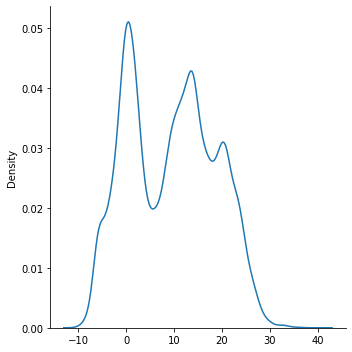

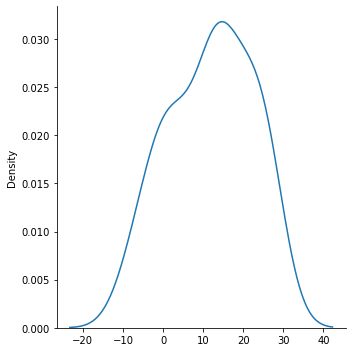

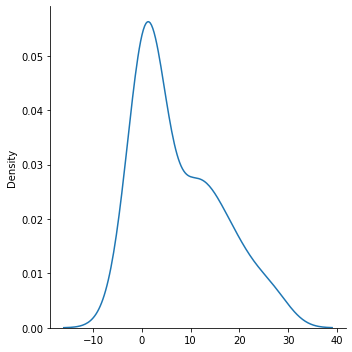

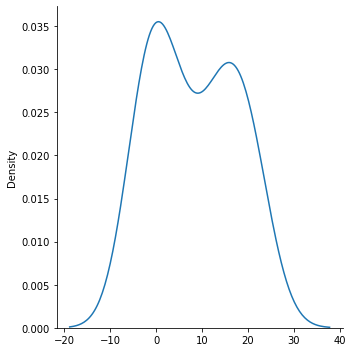

In [12]:
import seaborn as sns

sns.displot(y_train[total_dataset['region_code']== 19].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 2].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 142].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 0].values,kind="kde")
total_dataset[['brands','brands_language','countries','countries_en','region_code']][total_dataset['region_code']==2].head(3)


,brands,brands_language,countries,countries_en,region_code
Index,,,,,
121486,"Nutella,Ferrero",it,"Algérie,Belgique,Canada,France,Allemagne,Itali...","Algeria,Belgium,Canada,France,Germany,Italy,Ma...",2.0
170001,Trianon,en,Burkina Faso,Burkina Faso,2.0
29290,Woolworths,en,South Africa,South Africa,2.0


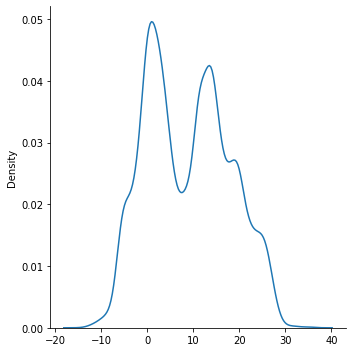

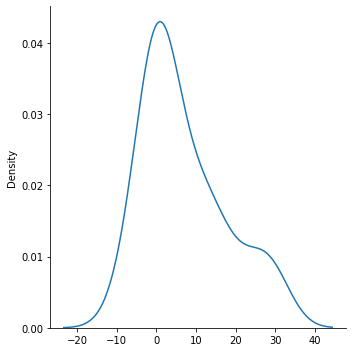

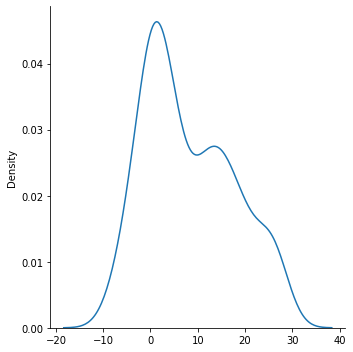

In [13]:
import seaborn as sns

sns.displot(y_train[total_dataset['region_code']== 150].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 160].values,kind="kde")
sns.displot(y_train[total_dataset['region_code']== 9].values,kind="kde")
total_dataset[['brands','brands_language','countries','countries_en','region_code']][total_dataset['region_code']==2].head(3)


import numpy as np
import pandas as pd
#from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

def plot_cluster(X, y, title="Cluster plot"):
    fig = X.plot.scatter(x='region_code', y='target', color=y)
    fig.layout.update(autosize=False, width=475, height=475,
                  coloraxis = dict(showscale=False, colorscale='Portland'),
                  font=dict(size=18),
                  title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig
    
a = pd.DataFrame(total_dataset['region_code'][:102028],columns=['region_code'])
a['target']= y_train.values
a = a.fillna(0)


model = KMeans(n_clusters=3, random_state=random_state).fit(a)
pred = model.labels_
fig = plot_cluster(a, pred, title="Continuous Only")
fig

In [14]:
X_train = total_dataset[:102028]
X_test = total_dataset[102028:]
for df in [X_train,X_test]:
    df['process_t'] = df['last_modified_t']-df['created_t']
    df.drop(columns =['last_modified_t','created_t'],inplace=True)
    train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
    test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test',show=False)
    

train_numeric_desc,train_categorical_desc = utils.my_df_describe(X_train,'train',show=False)
test_numeric_desc,test_categorical_desc = utils.my_df_describe(X_test,'test')


********************train********************
shape  (102028, 24)
********************test********************
shape  (25508, 25)
********************train********************
shape  (102028, 24)
********************test********************
shape  (25508, 24)
********************train********************
shape  (102028, 24)
********************test********************
shape  (25508, 24)
**********numerics**********


,count,mean,std,min,25%,50%,75%,max,unique,nulls,nulls_perc
serving_size,16529.0,7.862577e+01,7.797127e+01,0.0,28.0,45.0,112.00,800.0,325,8979,0.352007
additives_n,23016.0,1.895116e+00,2.480975e+00,0.0,0.0,1.0,3.00,27.0,25,2492,0.097695
ingredients_from_palm_oil_n,23016.0,2.845846e-02,1.693888e-01,0.0,0.0,0.0,0.00,2.0,3,2492,0.097695
ingredients_that_may_be_from_palm_oil_n,23016.0,6.612791e-02,3.013009e-01,0.0,0.0,0.0,0.00,6.0,6,2492,0.097695
region_code,25508.0,7.936871e+01,6.533374e+01,0.0,19.0,19.0,150.00,160.0,7,0,0.000000
process_t,25508.0,9.964602e+06,2.564623e+07,0.0,0.0,1.0,759407.25,175700459.0,9007,0,0.000000


**********categorical**********


,count,unique,top,freq,nulls,nulls_perc
creator,25508,806,usda-ndb-import,13483,0,0.000000
created_datetime,25508,23386,2017-03-09T10:45:47Z,5,0,0.000000
last_modified_datetime,25508,23323,2017-03-09T12:13:31Z,4,0,0.000000
product_name,25236,22577,Ice Cream,46,272,0.010663
brands,24999,11027,Carrefour,336,509,0.019955
countries,25500,290,US,13478,8,0.000314
countries_tags,25500,173,en:united-states,13629,8,0.000314
countries_en,25500,173,United States,13629,8,0.000314
ingredients_text,23016,21999,"Semolina (wheat), durum flour (wheat), niacin,...",19,2492,0.097695
additives,23014,21656,[ almonds -> en:almonds ],24,2494,0.097773


In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train2 = X_train[train_numeric_desc].fillna(-999)
X_test2 = X_test[train_numeric_desc].fillna(-999)


regr = linear_model.LinearRegression()
regr.fit(X_train2,y_train)
y_train2_preds = regr.predict(X_train2)
y_test2_preds = regr.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_train, y_train2_preds))
print("Train RMSE: %f" % (rmse))
#rmse = np.sqrt(mean_squared_error(y_test2, y_test2_preds))
#print("Test RMSE: %f" % (rmse))
#y_test_preds = regr.predict(X_test[train_numeric_desc.index])


Train RMSE: 9.017782


In [16]:
y_submission = pd.read_csv('./../../Dataset/preds_2.csv')#
y_submission.columns = ['target']

real_target  = pd.read_csv('./../../Dataset/target_test.csv')

In [17]:
rmse = np.sqrt(mean_squared_error(y_submission.target, 
real_target['nutrition-score-fr_100g']))
print(rmse)

4.401920585501098


In [18]:
X_test = X_test.reset_index()

In [19]:
a = X_test['region_code']== 19
a.values

array([False,  True,  True, ..., False, False, False])

In [20]:
y_submission = pd.read_csv('./../../Dataset/y_test_4.csv')#preds_2.csv')#
y_submission.columns = ['target']

real_target  = pd.read_csv('./../../Dataset/target_test.csv')

a,b,c,a2,b2,c2,a3 = 0.9 ,0.5, 1.0,-0.2 ,1.0 ,0.0,-1.0

aux = y_submission.copy()
aux['soel'] = X_test['region_code']
aux.target[aux['soel']==142]*=a
aux.target[aux['soel']==160]*=b
aux.target[aux['soel']==9]*=c
aux.target[aux['soel']==0]-=a3
aux.target[aux['soel']==2]-=a2
aux.target[aux['soel']==142]-=b2
aux.target[aux['soel']==150]-=c2
rmse = np.sqrt(mean_squared_error(aux.target, 
real_target['nutrition-score-fr_100g']))
print(rmse)
aux.drop(columns = ['soel'],inplace =True)
name1 = 'submission_version01_'+str(rmse)+'.csv'
aux.to_csv(name1)

4.40972678853804


In [21]:
mini = 1000
factor = 0
for i in range(1000,1020,1):
    sumb1  = pd.read_csv(name1)
    y_pred = sumb1.target.copy()*i/1000.0
    rmse = np.sqrt(mean_squared_error(y_pred, 
    real_target['nutrition-score-fr_100g']))
    if rmse<mini:
        mini= rmse
        factor = i/1000.0
print(mini)
print(factor)
name11 = 'submission_version01_'+str(mini)+'.csv'
y_pred.to_csv(name11)

4.409017518747222
1.007


In [22]:
y_submission = pd.read_csv('./../../Dataset/preds_2.csv')#
y_submission.columns = ['target']

real_target  = pd.read_csv('./../../Dataset/target_test.csv')

a,b,c,a2,b2,c2,a3 = 0.9, 0.9 ,0.6, 0.4 ,0.8 ,0.0 ,-1.0


aux = y_submission.copy()
aux['soel'] = X_test['region_code']
aux.target[aux['soel']==142]-=a
aux.target[aux['soel']==160]-=b
aux.target[aux['soel']==9]-=c
aux.target[aux['soel']==0]-=a3
aux.target[aux['soel']==2]-=a2
aux.target[aux['soel']==142]-=b2
aux.target[aux['soel']==150]-=c2
rmse = np.sqrt(mean_squared_error(aux.target, 
real_target['nutrition-score-fr_100g']))
print(rmse)
aux.drop(columns = ['soel'],inplace =True)
aux.to_csv('submission_6GB_'+str(rmse)+'.csv')





4.4008292229682615


In [23]:
y_submission = pd.read_csv('./../../Dataset/preds_2.csv')#
y_submission.columns = ['target']

real_target  = pd.read_csv('./../../Dataset/target_test.csv')

a,b,c,a2,b2,c2,a3 = 0.9, 0.5, 0.9, 0.4, 0.8 ,0.0, -1.0


aux = y_submission.copy()
aux['region_code'] = X_test['region_code']
aux.target[aux['region_code']==142]*=a
aux.target[aux['region_code']==160]*=b
aux.target[aux['region_code']==9]*=c
aux.target[aux['region_code']==0]-=a3
aux.target[aux['region_code']==2]-=a2
aux.target[aux['region_code']==142]-=b2
aux.target[aux['region_code']==150]-=c2
rmse = np.sqrt(mean_squared_error(aux.target, 
real_target['nutrition-score-fr_100g']))
print(rmse)
aux.drop(columns = ['region_code'],inplace =True)
name3 = 'submission_6GB_'+str(rmse)+'.csv'
aux.to_csv(name3)

4.400389191076607


In [24]:
mini = 1000
factor = 0
for i in range(1000,1020,1):
    sumb1  = pd.read_csv(name3)
    y_pred = sumb1.target.copy()*i/1000.0
    rmse = np.sqrt(mean_squared_error(y_pred, 
    real_target['nutrition-score-fr_100g']))
    if rmse<mini:
        mini= rmse
        factor = i/1000.0
print(mini)
print(factor)
mini
name5 = 'submission_6GB_'+str(mini)+'.csv'
y_pred.to_csv(name5)


4.39953583360904
1.007


In [28]:
mini = 1000
factor1,factor2 = 0,0
for i in range(20,150,2):
    for j in range(20,150,2):
        sumb1  = pd.read_csv(name3)
        sumb2  = pd.read_csv(name5)
        
        y_pred = i/100.0*sumb1.target.copy() + (j/100.0)*sumb2.target.copy() 

        rmse = np.sqrt(mean_squared_error(y_pred, 
        real_target['nutrition-score-fr_100g']))
        if rmse<mini:
            mini= rmse
            factor1 = i/100.0
            factor2 = j/100.0
print(mini)
print(factor1,factor2)
mini
name7 = 'submission_6GB_emsemble_'+str(mini)+'.csv'
y_pred.to_csv(name7)



4.399535072483882
0.62 0.38


In [27]:
mini = 1000
factor1,factor2 = 0,0
for i in range(0,150,2):
    sumb1  = pd.read_csv(name3)
    sumb2  = pd.read_csv(name5)
    
    y_pred = i/100.0*(sumb1.target.values * sumb2.target.values )

    rmse = np.sqrt(mean_squared_error(y_pred, 
    real_target['nutrition-score-fr_100g']))
    if rmse<mini:
        mini= rmse
        factor1 = i/100.0
        factor2 = j/100.0
print(mini)
print(factor1,factor2)
mini
name6 = 'submission_6GB_emsemble_'+str(mini)+'.csv'
#y_pred.to_csv(name6)


6.040104696471028
0.06 1.48
